# Linear Regression
* Using the normal equation
* Using gradient descent

Examples modified from:

<img src="images/geron.jpg" width="200" height="200">

https://github.com/ageron/handson-ml


## Let's generate some random data

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


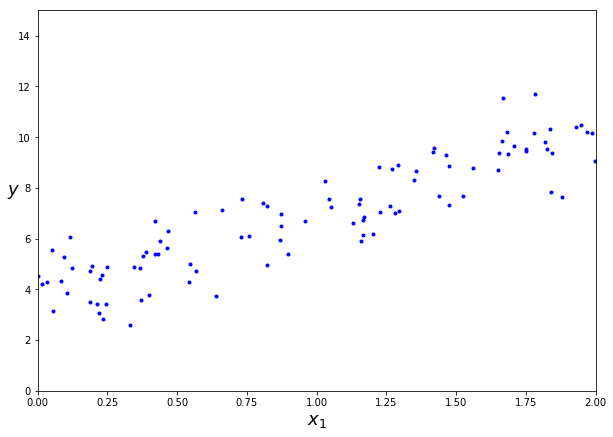

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear regression
$$\hat{y} = w\cdot x + b$$
$$L(w,b) = \sum_{i=1}^{n}\left(y^{(i)}-(w\cdot x^{(i)}+b)\right)^2$$
$b$ can be assimilated into $w$ by adding a new feature (1):
$$\bar{x}=(1,x) \in \mathbb{R}^{d+1}$$

$$\tilde{w} = (b,w)$$
$$w\cdot x + b = \tilde{w}\cdot \tilde{x} = (1,x)\cdot (b,w)$$
$$\tilde{w} = (X^{T}X)^{-1}(X^{T}y) $$

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
w

array([[3.74977978],
       [3.23026578]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(w)
y_predict

array([[ 3.74977978],
       [10.21031134]])

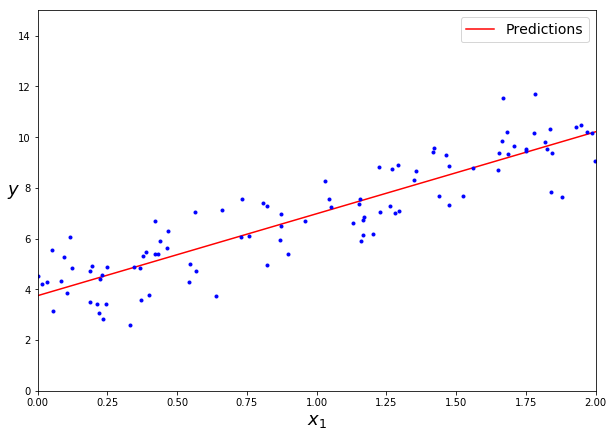

In [6]:

plt.figure(figsize=(10,7))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

This is equivalent to use the linear regression module 

(You might have to install sklearn)

conda install scikit-learn

### You might need to install scikit-learn

Open the anaconda prompt and type:

`conda install scikit-learn`

**Do the same for additional missing libraries**

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.74977978]), array([[3.23026578]]))

# Mini-batch gradient descent 

In general, for a decomposable loss function
$$L(w) = \sum_{i=1}^{n} l(w, x^{(i)}, y^{(i)})$$

The algorithm is essentially:
1. $w_{0}=0$
2. Repeat:
    * get the next batch of points B
    * $w_{t+1} = w_{t} - \eta_{t}\sum_{x,y \in B} \nabla l(w_{t}, x, y)$

Source: [UC San Diego Machine Learning Fundamentals course at edx](https://www.edx.org/course/machine-learning-fundamentals-uc-san-diegox-dse220x)

Source Image: [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/1280px-Gradient_descent.svg.png" width="600" height="400">


In [8]:
theta_path_mgd = []

m = len(X_b)
np.random.seed(42)

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [9]:
theta

array([[3.77712691],
       [3.27005361]])